# Self Organising Map Challenge

## The Kohonen Network

The Kohonen Self Organizing Map (SOM) provides a data visualization technique which helps to understand high dimensional data by reducing the dimensions of data to a map. SOM also represents clustering concept by grouping similar data together.

Unlike other learning technique in neural networks, training a SOM requires no target vector. A SOM learns to classify the training data without any external supervision.

![Network](http://www.pitt.edu/~is2470pb/Spring05/FinalProjects/Group1a/tutorial/kohonen1.gif)

### Structure
A network has a width and a height that descibes the grid of nodes.  For example, the grid may be 4x4, and so there would be 16 nodes.

Each node has a weight for each value in the input vector.  A weight is simply a float value that the node multiplies the input value by to determine how influential it is (see below)

Each node has a set of weights that match the size of the input vector.  For example, if the input vector has 10 elements, each node would have 10 weights.

### Training 
To train the network

1. Each node's weights are initialized.
2. We enumerate through the training data for some number of iterations (repeating if necessary).  The current value we are training against will be referred to as the `current input vector`
3. Every node is examined to calculate which one's weights are most like the input vector. The winning node is commonly known as the Best Matching Unit (BMU).
4. The radius of the neighbourhood of the BMU is now calculated. This is a value that starts large, typically set to the 'radius' of the lattice,  but diminishes each time-step. Any nodes found within this radius are deemed to be inside the BMU's neighbourhood.
5. Each neighbouring node's (the nodes found in step 4) weights are adjusted to make them more like the input vector. The closer a node is to the BMU, the more its weights get altered.
6. Go to step 2 until we've completed N iterations.
    

### Calculating the Best Matching Unit (BMU)

To determine the best matching unit, one method is to iterate through all the nodes and calculate the Euclidean distance between each node's weight vector and the current input vector. The node with a weight vector closest to the input vector is tagged as the BMU.

The Euclidean distance $\mathsf{distance}_{i}$ (from the input vector $V$ to the $i$th node's weights $W_i$)is given as (using Pythagoras):

$$ \mathsf{distance}_{i}=\sqrt{\sum_{k=0}^{k=n}(V_k - W_{i_k})^2}$$

where V is the current input vector and $W_i$ is the node's weight vector.  $n$ is the size of the input & weight vector.

*Note*: $V$ and $W$ are vectors.  $V$ is the input vector, and $W_i$ is the weight vector of the $i$th node.  $V_k$ and $W_{i_k}$ represent the $k$'th value within those vectors.  

The BMU is the node with the minimal distance for the current input vector

### Calculating the Neighbourhood Radius

The next step is to calculate which of the other nodes are within the BMU's neighbourhood. All these nodes will have their weight vectors altered.

First we calculate what the radius of the neighbourhood should be and then use Pythagoras to determine if each node is within the radial distance or not.

A unique feature of the Kohonen learning algorithm is that the area of the neighbourhood shrinks over time. To do this we use the exponential decay function:

Given a desired number of training iterations $n$:
$$n_{\mathsf{max iterations}} = 100$$

Calculate the radius $\sigma_t$ at iteration number $t$:

$$\sigma_t = \sigma_0 \exp\left(- \frac{t}{\lambda} \right) \qquad t = 1,2,3,4... $$

Where $\sigma_0$ denotes the neighbourhood radius at iteration $t=0$, $t$ is the current iteration. We define $\sigma_0$ (the initial radius) and $\lambda$ (the time constant) as below:

$$\sigma_0 = \frac{\max(width,height)}{2} \qquad \lambda = \frac{n_{\mathsf{max iterations}}}{\log(\sigma_0)} $$

Where $width$ & $height$ are the width and height of the grid.

### Calculating the Learning Rate

We define the initial leanring rate $\alpha_0$ at iteration $t = 0$ as:
$$\alpha_0 = 0.1$$

So, we can calculate the learning rate at a given iteration t as:

$$\alpha_t = \alpha_0 \exp \left(- \frac{t}{\lambda} \right) $$

where $t$ is the iteration number, $\lambda$ is the time constant (calculated above)
        
### Calculating the Influence

As well as the learning rate, we need to calculate the influence $\theta_t$ of the learning/training at a given iteration $t$.  

So for each node, we need to caclulate the euclidean distance $d_i$ from the BMU to that node.  Similar to when we calculate the distance to find the BMU, we use Pythagoras.  The current ($i$th) node's x position is given by $x(W_i)$, and the BMU's x position is, likewise, given by $x(Z)$.  Similarly, $y()$ returns the y position of a node.

$$ d_{i}=\sqrt{(x(W_i) - x(Z))^2 + (y(W_i) - y(Z))^2} $$

Then, the influence decays over time according to:

$$\theta_t = \exp \left( - \frac{d_{i}^2}{2\sigma_t^2} \right) $$

Where $\sigma_t$ is the neighbourhood radius at iteration $t$ as calculated above. 

Note: You will need to come up with an approach to x() and y().


### Updating the Weights

To update the weights of a given node, we use:

$$W_{i_{t+1}} = W_{i_t} + \alpha_t \theta_t (V_t - W_{i_t})$$
        
So $W_{i_{t+1}}$ is the new value of the weight for the $i$th node, $V_t$ is the current value of the training data, $W_{i_t}$ is the current weight and $\alpha_t$ and $\theta_t$ are the learning rate and influence calculated above.

*Note*: the $W$ and $V$ are vectors 

## Challenge

In this challenge, you need to implement a SOM such that it can categorise a set of random 3-dimensional colours.  The output should be an image of the organised data.  

### Expectations and Criteria
- Be prepared to talk through your decisions & thinking (we encourage you to include these in code comments too!)
- You may use any language you like (the examples given below are using Python)
- Avoid libraries that would do too much of the work for you. For example, in Python a good approach would be to use `numpy`, but no packages with SOM specific functionality
- Try and make your code as efficient as possible. Feel free to deviate from a literal interpretation of the instructions given under the **Training** heading above
- Consider the best way to structure your code and code base for later use by other developers or in anticipation of productionisation (you don't need to use a Jupyter Notebook)
- Include any tests you may have used (tests are not required however)
- Include a `Dockerfile` to package your code for production
- Be prepared to discuss your approach and process to productionise this application
- You can use code below to generate the trainig data of 10 colours:

[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]
 [0.05808361 0.86617615 0.60111501]
 [0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497]
 [0.18340451 0.30424224 0.52475643]
 [0.43194502 0.29122914 0.61185289]
 [0.13949386 0.29214465 0.36636184]
 [0.45606998 0.78517596 0.19967378]
 [0.51423444 0.59241457 0.04645041]]


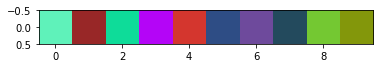

In [1]:
# Generate Data
import numpy as np
np.random.seed(seed=42)
input_data = np.random.random((10,3))
print(input_data)
img = np.reshape(input_data, (1,input_data.shape[0],3))


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.imshow(img)

### 1. Implement a Kohonen network
- Use the above description to implement a Kohonen network
- Make sure you can configure the size of the input vector and the size of the map
- Make sure node's weights are initialized to random values

In [2]:
import numpy as np
from numba import jit

class SOM():
    """
    My SOM Implementation. The focus of this implementation is in vectorisation and \
    setting up the classes to be compatible with Numba through the static method.
    
    Usage example:
        np.random.seed(seed=42)
        input_data = np.random.random((20,3))
        size = 10
        som = SOM(size,size)
        som.train(input_data, number_iterations=10, initial_learningrate=0.1)
    """
    def __init__(self, width, height):
        super(SOM, self).__init__()
        self.width = width
        self.height = height
        
    @staticmethod
    @jit(nopython=True)
    def calculate_euclidean_distance(matrix, vector):
        """
        L2 Norm Calculation by subtracting a single row from a column matrix. 
        """
        dist_array = np.sum((matrix - vector)**2, axis=1)
        return dist_array
        
    @staticmethod
    @jit(nopython=True)
    def calculate_BMU(current_input_vector, weights):
        """
        Best Matching Unit (BMU) calculation.
        - Reshapes into column array
        - Calculates L2 Norm
        - Finds argmin id and 2D coordinates of the BMU
        """
        weights_reshaped = weights.reshape(-1,3)
        dist_array = np.sum((weights_reshaped - current_input_vector)**2, axis=1)
        min_id = np.argmin(dist_array)
        
        BMU_x_coords = min_id // weights.shape[0]
        BMU_y_coords = min_id % weights.shape[1]
        BMU_coord = np.array([BMU_x_coords,BMU_y_coords])
        return min_id, BMU_coord   
    
    @staticmethod
    @jit(nopython=True)
    def calculate_decay(current_iteration, time_constant):
        """
        Decay calculation to run once at every time step.
        """
        decay = np.exp(-current_iteration / time_constant)
        return decay
    
    @staticmethod
    @jit(nopython=True)
    def calculate_radius(initial_radius,decay):
        """
        Radius calculation to run once at every time step.
        """
        current_radius = initial_radius * decay
        return current_radius

    @staticmethod
    @jit(nopython=True)
    def calculate_neighbourhood(current_radius, BMU_coord, dimensions):
        """
        Neighbour calculation:
        - Create 3D array where the first page is the x coordinate associated with \
        each element and the second page is the y coordinate. This allows us to get \
        the x and y coordinate of any particular grid element (i.e. (3,10))
        - Subtract BMU from this git to get manhattan distance of every element to BMU coords
        - Calculate L2 norm of entire grid from BMU coords
        - Check inside radius
        - Returns coordinates and IDs of nodes inside the current_radius
        """
        # Normally we would just use np.indicies but numba doesn't like it! so we are reworking from source code
        # Create coordinates grid
        N = 2 # 2D Iamge
        output_shape = np.array((N,dimensions[0],dimensions[1])) ###
        my_tuple = (output_shape[0],output_shape[1],output_shape[2])
        coords_list = np.ones(my_tuple,dtype=np.int32)
        for i, dim in enumerate(dimensions):
            if i == 0:
                reshape_shape = (dim,1)
            else:
                reshape_shape = (1,dim)
            idx_temp = np.arange(dim)
            idx = idx_temp.reshape(reshape_shape)
            coords_list[i] = idx
        coords_list = coords_list.reshape(2,-1).T
        
        # Subtract the BMU_coord coords to get manhattans
        dist = coords_list - np.array((BMU_coord[0],BMU_coord[1]))
        abs_dist = np.abs(dist) # Absolute value of manhattan
        dist_sum = np.sqrt(np.square(abs_dist).sum(1)) # L2 Norm
        # dist_sum = (abs_dist).sum(1) # L1 Norm
        id_mask = dist_sum <= int(current_radius) # Get true/false mask
        ids = np.where(id_mask)[0] 
        return coords_list, id_mask, ids # Returns coordinates of nodes inside the current_radius

    @staticmethod
    @jit(nopython=True)
    def calculate_learningrate(initial_learningrate, decay):
        """
        Learning rate calculation to run once at every time step.
        """
        current_learningrate = initial_learningrate * decay
        return current_learningrate

    @staticmethod
    @jit(nopython=True)
    def calculate_influence(coords_list, id_mask, ids, BMU_coord, current_radius):
        """
        Vectorised influence array calculation:
        - Calculate influence using the coords list of nodes inside the radius (i.e. (22,3))
        - Pad the influence array to the full size and fill with zeros (i.e. (100,3)) to assist in update calc
        """
        dist_array = np.sum((coords_list[id_mask] - BMU_coord)**2, axis=1)
        influence_array = np.exp(- dist_array / (2 * current_radius**2))
        padded_influence_array = np.zeros((coords_list.shape[0],1))
        influence_array = np.reshape(influence_array, (-1, 1))
        padded_influence_array[ids] = influence_array
        return padded_influence_array

    @staticmethod
    @jit(nopython=True)
    def calculate_update(weights, current_learningrate, padded_influence_array, current_input_vector):
        """
        Vectorised update calculation:
        - Use the padded influence array (i.e. 100,3) to calculate updates for all weights in a \
        single vectorised equation
        """
        weights_reshaped = weights.reshape(-1,3)
        updated_weights = weights_reshaped + current_learningrate * padded_influence_array * (current_input_vector - weights_reshaped)
        updated_weights = updated_weights.reshape(weights.shape)
        return updated_weights

    @staticmethod
    @jit(nopython=True)
    def get_current_input_vector(input_data):
        """
        Randomly select a single row from input data
        """
        number_of_rows = input_data.shape[0]
        random_indices = np.random.choice(number_of_rows, size=1)
        current_input_vector = input_data[random_indices, :]
        return current_input_vector

    @staticmethod
    @jit(nopython=True)
    def get_image(weights, size, number_attributes):
        """
        Get image for displaying the weights image
        """
        current_weights_image = np.reshape(weights, (size,size,number_attributes))
        return current_weights_image
    
    def train(self, input_data, number_iterations, initial_learningrate):
        """
        Training Loop:
        Initialise Data and Weights
        ## for 0 to n_iters
            ## Randomly choose current input data
            ## Calculate BMU
            ## Calculate Radius
            ## Calculate Neighbourhood
            ## Calculate Learning Rate
            ## Calculate Influence
            ## Calculate Update Weights
        ## Generate Image
        """


        self.input_data = input_data
        self.number_attributes = input_data.shape[1]
        self.weights = np.random.random((self.width, self.height, self.number_attributes))
        self.number_iterations = number_iterations
        self.initial_radius = np.max((self.width,self.height))/2
        self.initial_learningrate = initial_learningrate
        self.time_constant = self.number_iterations/np.log(self.initial_radius)
#         self.current_weights_image = np.random.random((self.width, self.height, self.number_attributes))
        
        for current_iteration in range(self.number_iterations):
            current_input_vector = SOM.get_current_input_vector(self.input_data)
            min_id, BMU_coord = SOM.calculate_BMU(current_input_vector, self.weights)
            decay = SOM.calculate_decay(current_iteration, self.time_constant)
            current_radius = SOM.calculate_radius(self.initial_radius, decay)
            dimensions = np.array([self.width, self.height])
            coords_list, id_mask, ids = SOM.calculate_neighbourhood(current_radius, BMU_coord, dimensions)
            current_learningrate = SOM.calculate_learningrate(self.initial_learningrate, decay)
            padded_influence_array = SOM.calculate_influence(coords_list, id_mask, ids, BMU_coord, current_radius)
            updated_weights = SOM.calculate_update(self.weights, current_learningrate, padded_influence_array, current_input_vector)
            self.weights = updated_weights
#             current_weights_image = SOM.get_image(self.weights, self.width, self.number_attributes)

### 2. Train a 10x10 network over 100 iterations

- Training data is a random set of 20 colours
- How long does this take?
- What does the map look like? (You will need to translate the weights of each node in the map to pixel data)
- What does this look like if you perform 200 & 500 iterations?

You should end up with something that looks like below after 500 iterations:

In [3]:
# Run once for Numba caching
np.random.seed(seed=42)
input_data = np.random.random((20,3))
size = 10
som = SOM(size,size)
som.train(input_data, number_iterations=10, initial_learningrate=0.1)

1.74 ms ± 61.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


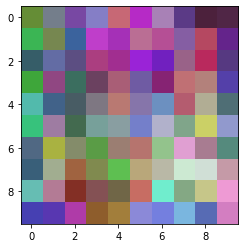

In [4]:
# Map size 10 and 100 iterations
np.random.seed(seed=42)
input_data = np.random.random((20,3))
size = 10
som100 = SOM(size,size)
%timeit -n 100 som100.train(input_data, number_iterations=100, initial_learningrate=0.1)

# Plot
weights_100_img = som100.get_image(som100.weights, size, 3)
plt.imshow(weights_100_img)

3.42 ms ± 74.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


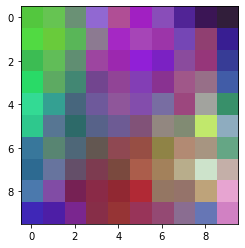

In [5]:
# Map size 10 and 200 iterations
np.random.seed(seed=42)
input_data = np.random.random((20,3))
size = 10
som100 = SOM(size,size)
%timeit -n 100 som100.train(input_data, number_iterations=200, initial_learningrate=0.1)

# Plot
weights_100_img = som100.get_image(som100.weights, size, 3)
plt.imshow(weights_100_img)

8.73 ms ± 298 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


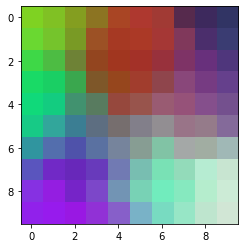

In [6]:
# Map size 10 and 500 iterations
np.random.seed(seed=42)
input_data = np.random.random((20,3))
size = 10
som100 = SOM(size,size)
%timeit -n 100 som100.train(input_data, number_iterations=500, initial_learningrate=0.1)

# Plot
weights_100_img = som100.get_image(som100.weights, size, 3)
plt.imshow(weights_100_img)

### 3. Train a 100x100 network over 1000 iterations

- This network will likely be significantly slower to train
- What could you do to improve performance?
- What does the network look like after 1000 iterations?

You should end up with something like below:

332 ms ± 9.4 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


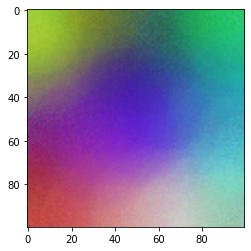

In [7]:
np.random.seed(seed=42)
input_data = np.random.random((100,3))
size = 100
som1000 = SOM(size,size)
%timeit -n 100 som1000.train(input_data, number_iterations=1000, initial_learningrate=0.1)

# Plot
weights_1000_img = som1000.get_image(som1000.weights, size, 3)
plt.imshow(weights_1000_img)

In [9]:
import profile
profile.run('input_data=np.random.random((100,3)); size=100; som = SOM(size,size); \
             som.train(input_data, number_iterations=1000, initial_learningrate=0.1);print')

         9017 function calls in 0.375 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     1000    0.000    0.000    0.000    0.000 :0(array)
        1    0.000    0.000    0.375    0.375 :0(exec)
        1    0.000    0.000    0.000    0.000 :0(getattr)
        1    0.000    0.000    0.000    0.000 :0(implement_array_function)
        1    0.000    0.000    0.000    0.000 :0(items)
        2    0.000    0.000    0.000    0.000 :0(random)
        1    0.000    0.000    0.000    0.000 :0(reduce)
        1    0.000    0.000    0.000    0.000 :0(setprofile)
        1    0.000    0.000    0.000    0.000 <__array_function__ internals>:2(amax)
     1000    0.000    0.000    0.000    0.000 <ipython-input-2-7209291588f4>:104(calculate_learningrate)
     1000    0.016    0.000    0.016    0.000 <ipython-input-2-7209291588f4>:113(calculate_influence)
     1000    0.047    0.000    0.047    0.000 <ipython-input-2-7209291588f4>:128(cal

### 4. Application

In [ ]:
import cv2
img = cv2.imread('./test_images/ed.jpeg')
print('Image Dimensions :', img.shape)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)
plt.show()

# Generate Data
np.random.seed(seed=2010)
def get_current_input_vector(input_data,count):
    number_of_rows = input_data.shape[0]
    random_indices = np.random.choice(number_of_rows, size=count)
    current_input_vector = input_data[random_indices, :]
    return current_input_vector

image_vector = rgb_img.reshape(-1,3)/255
current_input_vector = get_current_input_vector(image_vector, count = 5)

img = np.reshape(current_input_vector, (1,current_input_vector.shape[0],3))

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.imshow(img)

In [ ]:
np.random.seed(seed=42)
img = cv2.imread('./test_images/ed.jpeg')
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image_vector = rgb_img.reshape(-1,3)/255

size = 100
som3 = SOM(size,size)
som3.train(image_vector, number_iterations=2000, initial_learningrate=0.1)
output = np.reshape(som3.weights, (size,size,3))

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.imshow(output)

In [ ]:
import glob
import cv2 as cv2
keyword = "downloads"
path = glob.glob(f"./google-image-download/{keyword}/*")
cv_img = None
count = 0
for img in path:
    if count == 0:
        new = cv2.imread(img)
        new_rgb = cv2.cvtColor(new, cv2.COLOR_BGR2RGB)
        new_rgb = cv2.resize(new_rgb, (300,300), interpolation = cv2.INTER_AREA)
        cv_img = new_rgb
    elif count > 4:
        break
    else:
        new = cv2.imread(img)
        new_rgb = cv2.cvtColor(new, cv2.COLOR_BGR2RGB)
        new_rgb = cv2.resize(new_rgb, (300,300), interpolation = cv2.INTER_AREA)
        cv_img = np.concatenate((cv_img, new_rgb), axis = 1)
    count += 1

plt_img = cv_img/255
plt.imshow(plt_img)
plt.show()

In [ ]:
np.random.seed(seed=42)
image_vector = cv_img.reshape(-1,3)/255

size = 100
som3 = SOM(size,size)
som3.train(image_vector, number_iterations=2000, initial_learningrate=0.1)
output = np.reshape(som3.weights, (size,size,3))

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.imshow(output)